# 1. 股票数据获取

## 1.1 方法一
Python库：pandas-datareader   
https://pandas-datareader.readthedocs.io/en/latest/    

Python库：yfinance（没有提供一种方法来抓取雅虎财经上可用的任何新闻报道/分析，不适用于构建依赖于情感分析的模型）   
可以访问雅虎财经上可用的财务数据    
import yfinance as yf    
   
https://ntguardian.wordpress.com/2016/09/19/introduction-stock-market-data-python-1/

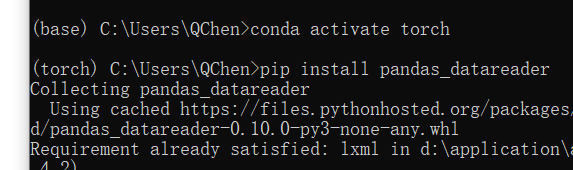

In [123]:
import pandas as pd
from pandas_datareader import data
import matplotlib.pyplot as plt
from datetime import datetime

In [131]:
#定义时间
codeDict = {'阿里巴巴':'BABA', '京东':'JD','沃尔玛':'WMT','亚马逊':'AMZN','易贝':'EBAY'}
start_date = '2020-01-01'
end_date = '2022-03-20'

# 阿里巴巴股票数据
babaDf = data.get_data_yahoo(codeDict['阿里巴巴'], start_date, end_date)
# 查看前五行数据
babaDf.head(5)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-12-31,213.639999,210.729996,212.000000,212.100006,6773600,212.100006
2020-01-02,219.979996,216.539993,216.600006,219.770004,15873500,219.770004
2020-01-03,218.203003,216.009995,216.350006,217.000000,8604500,217.000000
2020-01-06,217.160004,214.089996,214.889999,216.639999,11885500,216.639999
2020-01-07,218.940002,216.690002,217.639999,217.630005,9388000,217.630005


In [132]:
# 阿里巴巴描述统计
babaDf.describe()

,High,Low,Open,Close,Volume,Adj Close
count,560.000000,560.000000,560.000000,560.000000,5.600000e+02,560.000000
mean,211.879620,206.142904,209.244952,209.065911,2.060766e+07,209.065911
std,52.454826,51.954351,52.388599,52.269010,1.446593e+07,52.269010
min,80.139999,73.279999,75.099998,76.760002,6.231400e+06,76.760002
25%,174.872494,169.312500,173.375004,171.924999,1.314778e+07,171.924999
50%,216.585007,212.615005,215.220001,215.260002,1.721460e+07,215.260002
75%,251.674995,244.135002,247.160000,248.685001,2.255600e+07,248.685001
max,319.320007,308.910004,313.500000,317.140015,1.598343e+08,317.140015


### 数据可视化

Populating the interactive namespace from numpy and matplotlib


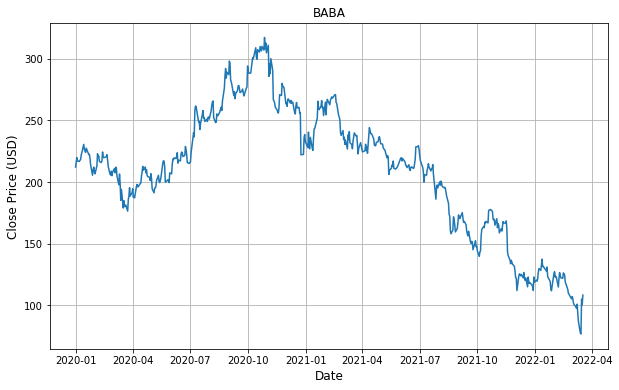

In [149]:
# 阿里巴巴股票走势图
%matplotlib inline 
%pylab inline 
pylab.rcParams['figure.figsize']=(10,6)
plt.plot(babaDf['Close'])
plt.title('BABA')
plt.grid(True)
plt.xlabel('Date',fontsize=12)
plt.ylabel('Close Price (USD)',fontsize=12)
plt.show()

In [146]:
# 特征工程
def change(column):
    buyPrice=column[0]
    curPrice=column[column.size-1]
    # 累计涨跌幅
    priceChange=(curPrice-buyPrice)/buyPrice
    if(priceChange > 0):
        print('股票累计上涨=',priceChange)
    elif(priceChange == 0):
        print('股票累计没有变化=',priceChange)
    else:
        print('股票累计下跌=',priceChange)
    return priceChange
# 获取收盘价Close这一列的数据
closeCol = babaDf['Close']
# 调用函数，获取涨跌幅
babaChange = change(closeCol)

股票累计下跌= -0.48939179662775734


Populating the interactive namespace from numpy and matplotlib


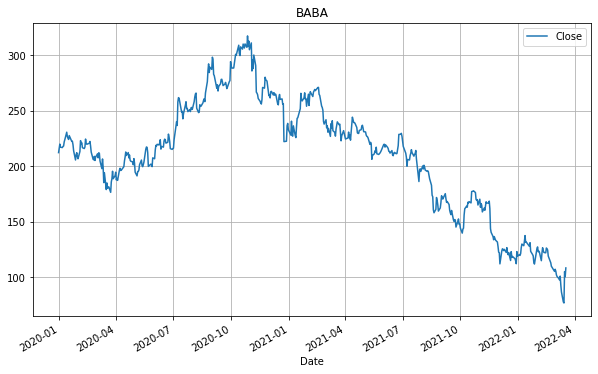

In [150]:
%matplotlib inline 
%pylab inline 
pylab.rcParams['figure.figsize']=(10,6) # 改变大小plot
babaDf["Close"].plot(grid=True)   # 调整后的收盘价
# plt.plot(label='baba')
plt.title('BABA')
plt.legend()
plt.show()

## 1.2 方法二：爬虫

In [154]:
import random
import time
from requests import get
import json
import pandas as pd

In [158]:
# user_agent列表
user_agent_list = [
    'Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/537.1 (KHTML, like Gecko) Chrome/21.0.1180.71 Safari/537.1 LBBROWSER',
    'Mozilla/4.0 (compatible; MSIE 6.0; Windows NT 5.1; SV1; QQDownload 732; .NET4.0C; .NET4.0E)',
    'Mozilla/5.0 (Windows NT 5.1) AppleWebKit/535.11 (KHTML, like Gecko) Chrome/17.0.963.84 Safari/535.11 SE 2.X MetaSr 1.0',
    'Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Maxthon/4.4.3.4000 Chrome/30.0.1599.101 Safari/537.36',
    'Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/38.0.2125.122 UBrowser/4.0.3214.0 Safari/537.36'
]

# referer列表
referer_list = [
    'http://fund.eastmoney.com/',
    'http://fund.eastmoney.com/006327.html?spm=search',
    'http://fund.eastmoney.com/006327.html'
]


def get_html(baseUrl):
    # 获取一个随机user_agent和Referer
    headers = {'User-Agent': random.choice(user_agent_list), 'Referer': random.choice(referer_list)}
    try:
        resp = get(baseUrl, headers=headers)
        # print(resp.status_code)
        if resp.status_code == 200:
            return resp.text
        print("没有爬取到相应的内容")
        return None
    except RequestException:
        print("没有爬取到相应的内容")
        return None


if __name__ == "__main__":

    t = time.time()
    rt = int(round(t * 1000))
#     baseUrl = "http://api.fund.eastmoney.com/f10/lsjz?callback=jQuery18306953920586766751_1647761160799&fundCode=006327&pageIndex=1&pageSize=20&startDate=&endDate=&_=1647761160816"
    baseUrl = "http://api.fund.eastmoney.com/f10/lsjz?callback=jQuery18306953920586766751_1647761160799&fundCode=006327&pageIndex=1&pageSize=20&startDate=&endDate=&_=" + str(rt)
    data = get_html(baseUrl)
    print(data)

jQuery18306953920586766751_1647761160799({"Data":{"LSJZList":[{"FSRQ":"2022-03-17","DWJZ":"0.7873","LJJZ":"0.7873","SDATE":null,"ACTUALSYI":"","NAVTYPE":"1","JZZZL":"0.94","SGZT":"限制大额申购","SHZT":"开放赎回","FHFCZ":"","FHFCBZ":"","DTYPE":null,"FHSP":""},{"FSRQ":"2022-03-16","DWJZ":"0.7800","LJJZ":"0.7800","SDATE":null,"ACTUALSYI":"","NAVTYPE":"1","JZZZL":"27.20","SGZT":"限制大额申购","SHZT":"开放赎回","FHFCZ":"","FHFCBZ":"","DTYPE":null,"FHSP":""},{"FSRQ":"2022-03-15","DWJZ":"0.6132","LJJZ":"0.6132","SDATE":null,"ACTUALSYI":"","NAVTYPE":"1","JZZZL":"-3.48","SGZT":"限制大额申购","SHZT":"开放赎回","FHFCZ":"","FHFCBZ":"","DTYPE":null,"FHSP":""},{"FSRQ":"2022-03-14","DWJZ":"0.6353","LJJZ":"0.6353","SDATE":null,"ACTUALSYI":"","NAVTYPE":"1","JZZZL":"-9.89","SGZT":"限制大额申购","SHZT":"开放赎回","FHFCZ":"","FHFCBZ":"","DTYPE":null,"FHSP":""},{"FSRQ":"2022-03-11","DWJZ":"0.7050","LJJZ":"0.7050","SDATE":null,"ACTUALSYI":"","NAVTYPE":"1","JZZZL":"-5.56","SGZT":"限制大额申购","SHZT":"开放赎回","FHFCZ":"","FHFCBZ":"","DTYPE":null,"FHSP":""}

In [161]:
# 将结果格式化一下 留下有用的字符串部分
res = re.findall(r'\{.*\}',data)
 # 将一个json对象（str）转化为相对应的python对象
jsonText = json.loads(res[0])
jsonText

{'Data': {'LSJZList': [{'FSRQ': '2022-03-17',
    'DWJZ': '0.7873',
    'LJJZ': '0.7873',
    'SDATE': None,
    'ACTUALSYI': '',
    'NAVTYPE': '1',
    'JZZZL': '0.94',
    'SGZT': '限制大额申购',
    'SHZT': '开放赎回',
    'FHFCZ': '',
    'FHFCBZ': '',
    'DTYPE': None,
    'FHSP': ''},
   {'FSRQ': '2022-03-16',
    'DWJZ': '0.7800',
    'LJJZ': '0.7800',
    'SDATE': None,
    'ACTUALSYI': '',
    'NAVTYPE': '1',
    'JZZZL': '27.20',
    'SGZT': '限制大额申购',
    'SHZT': '开放赎回',
    'FHFCZ': '',
    'FHFCBZ': '',
    'DTYPE': None,
    'FHSP': ''},
   {'FSRQ': '2022-03-15',
    'DWJZ': '0.6132',
    'LJJZ': '0.6132',
    'SDATE': None,
    'ACTUALSYI': '',
    'NAVTYPE': '1',
    'JZZZL': '-3.48',
    'SGZT': '限制大额申购',
    'SHZT': '开放赎回',
    'FHFCZ': '',
    'FHFCBZ': '',
    'DTYPE': None,
    'FHSP': ''},
   {'FSRQ': '2022-03-14',
    'DWJZ': '0.6353',
    'LJJZ': '0.6353',
    'SDATE': None,
    'ACTUALSYI': '',
    'NAVTYPE': '1',
    'JZZZL': '-9.89',
    'SGZT': '限制大额申购',
    'SHZT': 

In [116]:
# 保存或使用数据
# CSV/EXCEL + Pandas
infos = jsonText['Data']['LSJZList']

for info in infos:
    FSRQ = info['FSRQ']      # 日期
    DWJZ = info['DWJZ']      # 单位净值
    LJJZ = info['LJJZ']      # 累计净值
    JZZZL = info['JZZZL']    # 增长率
    print(FSRQ, JZZZL)

2022-03-17 0.94
2022-03-16 27.20
2022-03-15 -3.48
2022-03-14 -9.89
2022-03-11 -5.56
2022-03-10 -4.48
2022-03-09 2.40
2022-03-08 -1.55
2022-03-07 -4.18
2022-03-04 -3.43
2022-03-03 -2.86
2022-03-02 -0.81
2022-03-01 1.08
2022-02-28 -1.12
2022-02-25 0.07
2022-02-24 -1.95
2022-02-23 -0.75
2022-02-22 -2.48
2022-02-21 -2.23
2022-02-18 -4.49


In [121]:
infosList = []
indexList = []
titleList = ['FSRQ','DWJZ','LJJZ','JZZZL']

for info in infos:
    # print(info)
    FSRQ = info['FSRQ']     # 日期
    DWJZ = info['DWJZ']     # 单位净值
    LJJZ = info['LJJZ']     # 累计净值
    JZZZL = info['JZZZL']     # 增长率

    indexList.append(FSRQ)

    temList = []
    temList.append(FSRQ)
    temList.append(float(DWJZ))
    temList.append(float(LJJZ))
    temList.append(float(JZZZL))
    infosList.append(temList)

df = pd.DataFrame(infosList, index=indexList, columns=titleList).sort_index()
df

,FSRQ,DWJZ,LJJZ,JZZZL
2022-02-18,2022-02-18,0.9368,0.9368,-4.49
2022-02-21,2022-02-21,0.9159,0.9159,-2.23
2022-02-22,2022-02-22,0.8932,0.8932,-2.48
2022-02-23,2022-02-23,0.8865,0.8865,-0.75
2022-02-24,2022-02-24,0.8692,0.8692,-1.95
2022-02-25,2022-02-25,0.8698,0.8698,0.07
2022-02-28,2022-02-28,0.8601,0.8601,-1.12
2022-03-01,2022-03-01,0.8694,0.8694,1.08
2022-03-02,2022-03-02,0.8624,0.8624,-0.81
2022-03-03,2022-03-03,0.8377,0.8377,-2.86


## 1.3 收费API